In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data=data.drop(['Unnamed: 0'],axis=1)

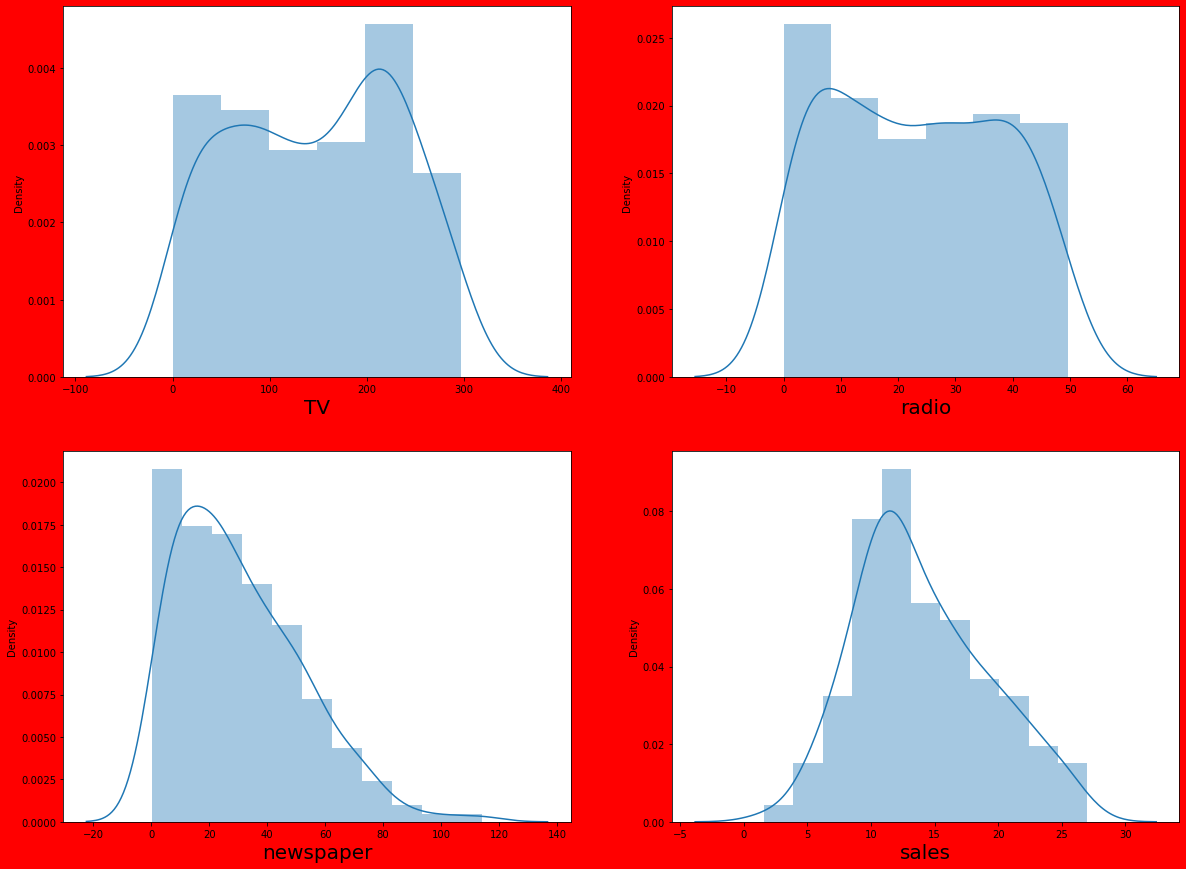

In [9]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=5:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

from above graph we can see data is nearly normalised,some skewness is present

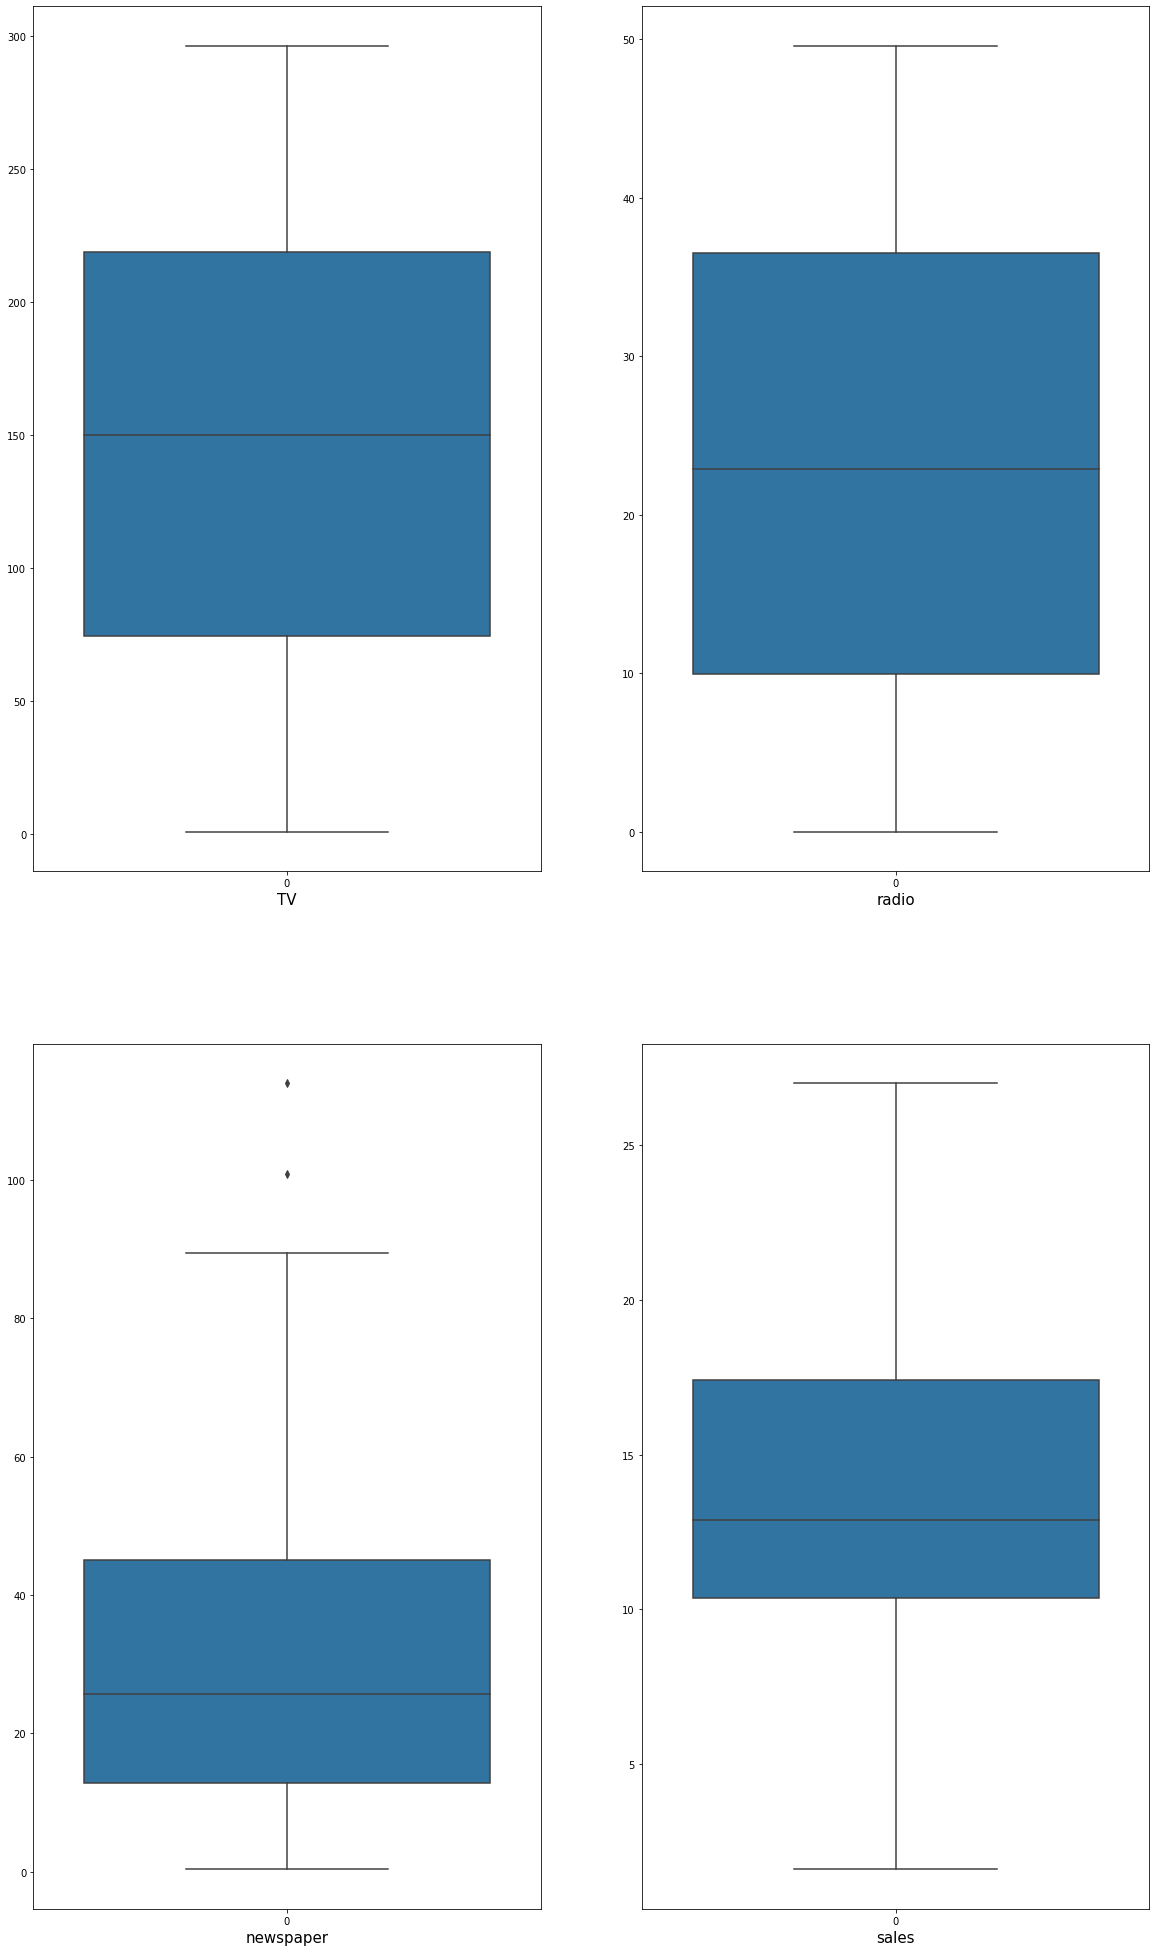

In [12]:
plt.figure(figsize=(20,35))
plotnumber=1
for column in data:
    if plotnumber<=6:
        plt.subplot(2,2,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

from boxplot graph it is observed that outliers are very few,some are present in newpaper features

In [13]:
corr=data.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


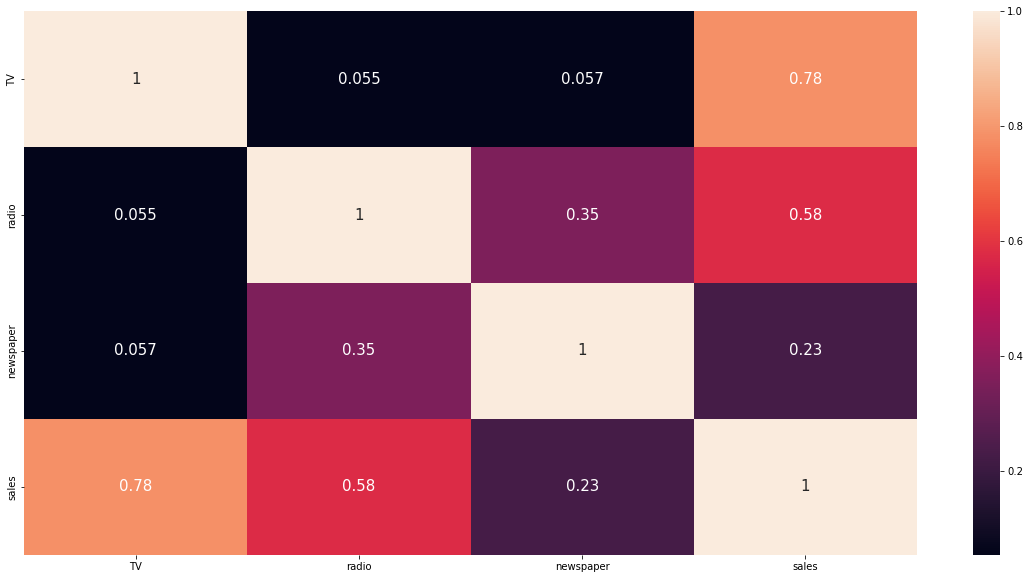

In [16]:
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.show()

from heat map it can be analysis that there is no multicolinearity present in the data

In [17]:
X=data.drop(columns=['sales'])
y=data['sales']

In [18]:
#standard scaler has been applied 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=80)
y_train.head()

42     20.7
189     6.7
74     17.0
36     25.4
0      22.1
Name: sales, dtype: float64

# LINEAR REGRESSION

In [20]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
regression.score(x_train,y_train)

0.9161683973913906

In [22]:
regression.score(x_test,y_test)

0.8070473986760942

In [23]:
y_pred=regression.predict(x_test)

In [24]:
y_pred

array([19.70609731, 13.84949305, 19.3663976 , 17.24762242, 23.04259511,
       15.39285887,  5.80021538, 10.817165  , 14.62087311, 19.4421281 ,
        9.29852846, 21.63732587, 12.96530246, 20.38825969,  8.29243257,
       16.52579048,  6.71086055, 15.4482001 , 10.07209229, 19.28997864,
       16.42915086, 16.24966761, 16.02535696,  9.91077321, 12.8674351 ,
       14.39369216, 14.52563572, 20.21141073,  9.96297515, 11.46334936,
       13.27566112, 15.24454513, 12.01435117,  8.19289493, 21.01515335,
       13.17563553, 20.97640582, 12.75973766,  8.02213598, 18.27313072])

# ADA BOOST REGRESSOR

In [25]:
from sklearn.ensemble import AdaBoostRegressor

In [26]:
ada=AdaBoostRegressor()

In [27]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [28]:
y_pred1=ada.predict(x_train)

In [29]:
from sklearn import metrics

In [30]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.9802558238207906

In [31]:
y_test_pred=ada.predict(x_test)

In [32]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.9601001703083811

CROSS VALIDATION SCORE

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(ada, X, y, cv=10)
scores

array([0.96574138, 0.93317953, 0.96903648, 0.96413542, 0.96806581,
       0.95338861, 0.96129704, 0.95307044, 0.93865981, 0.95777849])

In [35]:
cross_val_score(ada, X, y, cv=10).mean()

0.9579646208295788

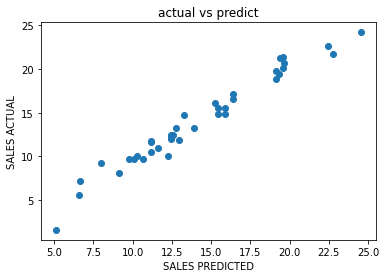

In [37]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('SALES PREDICTED')
plt.ylabel('SALES ACTUAL')
plt.title('actual vs predict')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
y_test_pred=ada.predict(x_test)

In [42]:
mean_absolute_error(y_test,y_test_pred)

0.7400983861064822

In [43]:
mean_squared_error(y_test,y_pred)

4.849669475721289

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.202196511604105

saving the model 

In [45]:
import pickle

In [46]:
filename='sales prediction'
pickle.dump(ada,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))